In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2

In [2]:
import os

In [3]:
import numpy as np

In [4]:
ImgSize = 256
BatchSize = 32
Channel = 3

In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato",
    shuffle=True,
    image_size=(ImgSize,ImgSize),
    batch_size = BatchSize
)

Found 2152 files belonging to 3 classes.


In [16]:
classes=dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
len(dataset)

68

<h1>Seeing the dimensions</h1>

In [18]:

for img,label in dataset.take(1):
    print(img.shape)
    print(label.numpy())

(32, 256, 256, 3)
[0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 2 1 1 0 1 0 1 1 1 0 2 0 0 1]


<h1>Visualizing the Image</h1>

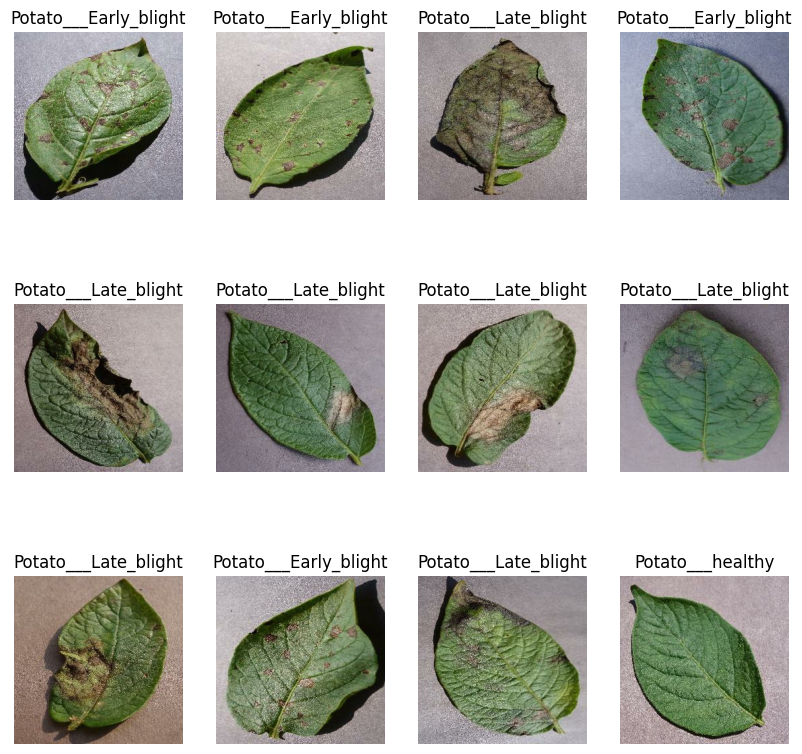

In [19]:
plt.figure(figsize=(10,10))
for img,label in dataset.take(1).as_numpy_iterator():
    for i in range(12):
        image = img[i]
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image.astype('uint8'))
        plt.title(classes[label[i]])
        plt.axis("off")
        

<h1>Splitting our dataset</h1>

In [20]:
train_size = 0.8
validation_size=0.1
test_size = 0.1

In [21]:
len_data = len(dataset)
len_data

68

In [22]:
len_data*train_size

54.400000000000006

In [23]:
train_set = dataset.take(int(len_data*train_size))
len(train_set)

54

In [24]:
remaining_dataset = dataset.skip(int(len_data*train_size))
len(remaining_dataset)

14

In [25]:
len_data*validation_size

6.800000000000001

In [26]:
validation_set = remaining_dataset.take(int(len_data*validation_size))
len(validation_set)

6

In [27]:
test_set = remaining_dataset.skip(int(len_data*validation_size))
len(test_set)

8

In [28]:
print(len(train_set))
print(len(validation_set))
print(len(test_set))

54
6
8


In [29]:
train_set = train_set.cache().shuffle(1000)
validation_set = validation_set.cache().shuffle(1000)
test_set = test_set.cache().shuffle(1000)

<h1>Resizing and Scalling</h1>

In [30]:
resizing_and_scalling = tf.keras.Sequential([
    layers.Resizing(ImgSize,ImgSize),
    layers.Rescaling(1.0/255)
])

<h1>Data Augmentation</h1>

In [31]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

<h1>Model Building</h1>

In [32]:
input_shape = (BatchSize,ImgSize,ImgSize,Channel)
number_of_classes=3

In [39]:
model = tf.keras.Sequential([
    resizing_and_scalling,
    data_augmentation,
    # layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    # layers.MaxPooling2D((2,2)),
    # layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    # layers.MaxPooling2D((2,2)),
    # layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    # layers.MaxPooling2D((2,2)),
    # layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    # layers.MaxPooling2D((2,2)),
    # layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    # layers.MaxPooling2D((2,2)),
    # layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    # layers.MaxPooling2D((2,2)),

    # layers.Flatten(),
    # layers.Dense(number_of_classes,activation='softmax'),

    layers.Conv2D(10,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(20,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(number_of_classes,activation='softmax')
])

In [40]:
model.build(input_shape = input_shape)

In [42]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 254, 254, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 127, 127, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 125, 125, 20)          │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 62, 62, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 76880)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 3)                     │         230,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,743 (909.15 KB)

 Trainable params: 232,743 (909.15 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [44]:
model.fit(
    train_set,
    epochs=5,
    batch_size=BatchSize,
    verbose=1,
    validation_data=validation_set
)

Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.6198 - loss: 0.9354 - val_accuracy: 0.8438 - val_loss: 0.4364
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.8743 - loss: 0.3465 - val_accuracy: 0.9219 - val_loss: 0.2288
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 221ms/step - accuracy: 0.9218 - loss: 0.2104 - val_accuracy: 0.8125 - val_loss: 0.4316
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.9321 - loss: 0.1865 - val_accuracy: 0.9583 - val_loss: 0.1592
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.9279 - loss: 0.1721 - val_accuracy: 0.9010 - val_loss: 0.1851


In [45]:
score = model.evaluate(test_set)
score

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9087 - loss: 0.2213


[0.20799873769283295, 0.9137930870056152]


<h1>You can now play with the callback history</h1>

<h1>model prediction</h1>

In [58]:
for image_batch,label in test_set.take(1):
    # first_img = image_batch[0].numpy()
    # first_label = label[0]

    predicted_label = model.predict(image_batch)

    
    # plt.imshow(first_img.astype('uint8'))
    # print("actual image label: ",classes[first_label])
    # print("predicted image label",classes[predicted_label])

    for i in range(10):
        print("actual image label for img ",i," is ",classes[label[i]])
        print("predicted image label for img ",i," is ",classes[np.argmax(predicted_label[i])])
        print("\n")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
actual image label for img  0  is  Potato___Late_blight
predicted image label for img  0  is  Potato___Late_blight


actual image label for img  1  is  Potato___Early_blight
predicted image label for img  1  is  Potato___Early_blight


actual image label for img  2  is  Potato___Late_blight
predicted image label for img  2  is  Potato___Late_blight


actual image label for img  3  is  Potato___Early_blight
predicted image label for img  3  is  Potato___Early_blight


actual image label for img  4  is  Potato___Early_blight
predicted image label for img  4  is  Potato___Early_blight


actual image label for img  5  is  Potato___Late_blight
predicted image label for img  5  is  Potato___Late_blight


actual image label for img  6  is  Potato___Early_blight
predicted image label for img  6  is  Potato___Early_blight


actual image label for img  7  is  Potato___Late_blight
predicted image label for img  7  is  Potato___Late_blight


actual image labe

<h1>Saving the model</h1>

In [64]:
model_version = 1

In [67]:
os.makedirs(f"Potato_Model/{model_version}/", exist_ok=True)

In [68]:
model.save(f"Potato_Model/{model_version}/PotatoModel.keras")